# Busiest month visualizing available and unavailable listing on a single plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading in the data
df = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(2)
memory usage: 42.5+ MB


## To get the busiest month for airbnb in seattle, this analysis assumes that listings are unavailable ('available'=='f') when they are occupied by customers. And are available ('available'=='t')  when they are still in the market open for renters.
Hypothesis: the month with higher number of unavailability is the busiest month. This means that higher number of listings have been rented out in that month.


In [5]:
df.head()

listing_id available   price
date                                    
2016-01-04      241032         t  $85.00
2016-01-05      241032         t  $85.00
2016-01-06      241032         f     NaN
2016-01-07      241032         f     NaN
2016-01-08      241032         f     NaN

In [6]:
df.sort_values(by=['date'], inplace=True)

In [7]:
df = df.astype({'listing_id':str})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: object(3)
memory usage: 42.5+ MB


In [9]:
#resampling data to monthly data
df_month = df.resample('M')

In [10]:
df_month

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [11]:
# to get the count of available and unavalable listings per month
df_unique = df_month.available.value_counts()

In [12]:
df_unique

date        available
2016-01-31  t            59239
            f            47665
2016-02-29  t            73321
            f            37401
2016-03-31  t            83938
            f            34420
2016-04-30  t            76037
            f            38503
2016-05-31  t            79971
            f            38387
2016-06-30  t            77244
            f            37296
2016-07-31  t            74222
            f            44136
2016-08-31  t            76347
            f            42011
2016-09-30  t            77246
            f            37294
2016-10-31  t            82438
            f            35920
2016-11-30  t            81780
            f            32760
2016-12-31  t            87061
            f            31297
2017-01-31  t             5698
            f             1938
Name: available, dtype: int64

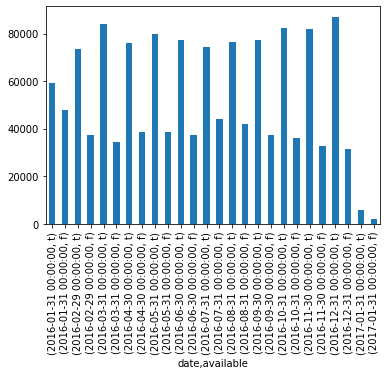

In [13]:
# to show the number of listings that are available in a month, and also the number of unavailable listings in a month
df_unique.plot(kind='bar')

## my problem: i want to display my plot like this: 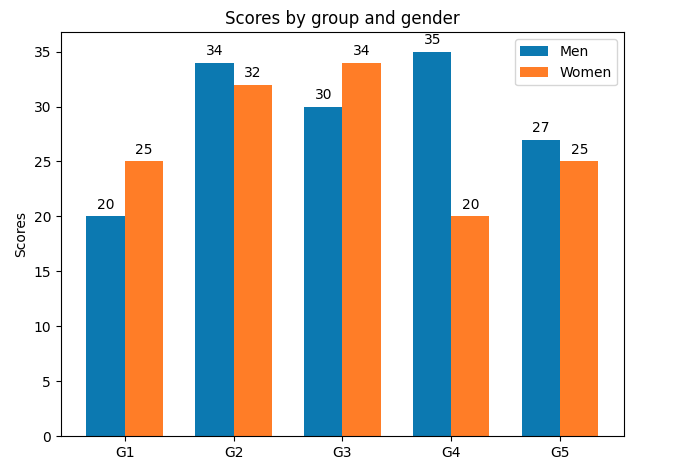
## The x-axis should contain months, and for each month there should be 2bars, each for the availabilty group t/f. And the y-axis should contain the count of t/f.
## Please how can i do this?

In [14]:
df_tf =pd.DataFrame(df_unique)

In [15]:
df_tf

available
date       available           
2016-01-31 t              59239
           f              47665
2016-02-29 t              73321
           f              37401
2016-03-31 t              83938
           f              34420
2016-04-30 t              76037
           f              38503
2016-05-31 t              79971
           f              38387
2016-06-30 t              77244
           f              37296
2016-07-31 t              74222
           f              44136
2016-08-31 t              76347
           f              42011
2016-09-30 t              77246
           f              37294
2016-10-31 t              82438
           f              35920
2016-11-30 t              81780
           f              32760
2016-12-31 t              87061
           f              31297
2017-01-31 t               5698
           f               1938

In [18]:
# rename index 'available' to allow converting the indexes to columns. This is to enable easy sns plotting
df_tf.index = df_tf.index.set_names(['date','label'])

In [19]:
# converting indexes to columns. This is to enable easy sns plotting
df_tf.reset_index(inplace=True)

In [20]:
df_tf.head()

date label  available
0 2016-01-31     t      59239
1 2016-01-31     f      47665
2 2016-02-29     t      73321
3 2016-02-29     f      37401
4 2016-03-31     t      83938

In [21]:
df_tf['unavailable'] = df_tf.loc[df_tf.label == 'f'].available

In [22]:
df_tf.head()

date label  available  unavailable
0 2016-01-31     t      59239          NaN
1 2016-01-31     f      47665      47665.0
2 2016-02-29     t      73321          NaN
3 2016-02-29     f      37401      37401.0
4 2016-03-31     t      83938          NaN

In [23]:
df_tf['available'] = df_tf.loc[df_tf.label == 't'].available

In [24]:
df_tf.head()

date label  available  unavailable
0 2016-01-31     t    59239.0          NaN
1 2016-01-31     f        NaN      47665.0
2 2016-02-29     t    73321.0          NaN
3 2016-02-29     f        NaN      37401.0
4 2016-03-31     t    83938.0          NaN

In [25]:
# change index for time series
df_tf.index = df_tf.date

In [26]:
df_tf.head()

date label  available  unavailable
date                                               
2016-01-31 2016-01-31     t    59239.0          NaN
2016-01-31 2016-01-31     f        NaN      47665.0
2016-02-29 2016-02-29     t    73321.0          NaN
2016-02-29 2016-02-29     f        NaN      37401.0
2016-03-31 2016-03-31     t    83938.0          NaN

In [ ]:
## plot result on a bar chart, zoomed output
fig, ax = plt.subplots(figsize=(15,10))
width = 0.5  # the width of the bars


rects1 = ax.bar(x - width/2, df_tf.index.month_name(),df width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
bars = sns.barplot(x=df2_resample.index.month_name(), y=df2_resample.unavailable_count)
# set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('unavailable_count', weight='normal', size=20)
ax.set_ylim([30000,50000]) # increase the y origin from 0 to 100
plt.title('Numbers of unavailable listings per month in 2016', fontsize=20)
# set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
#attach a text lable above each bar displaying the price
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate('{:.1f}'.format(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')